In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import tensorflow as tf

import os
import sys
import time

from tensorflow import keras



In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
dir(housing)
print(housing.DESCR)
print("=" * 100)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split

# default test_size is 0.25
x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state=7
)

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state=11
)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)


In [5]:
from tensorflow.keras.models import Model

class WideDeepModel(Model):
    def __init__(self):
        super().__init__()
        """定义模型的层次"""
        self.hidden1_layer = keras.layers.Dense(30, activation="relu")
        self.hidden2_layer = keras.layers.Dense(30, activation="relu")
        self.output_layer = keras.layers.Dense(1)
        
    def call(self, input):
        """完成模型的正向计算"""
        hidden1 = self.hidden1_layer(input)
        hidden2 = self.hidden2_layer(hidden1)
        concat = keras.layers.concatenate([input, hidden2])
        output = self.output_layer(concat)
        return output
    
model = WideDeepModel()
model.build(input_shape=(None, 8))
    

model.compile(loss="mean_squared_error", optimizer="sgd")
callbacks = [
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)
]
model.summary()

Model: "wide_deep_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  270       
_________________________________________________________________
dense_1 (Dense)              multiple                  930       
_________________________________________________________________
dense_2 (Dense)              multiple                  39        
Total params: 1,239
Trainable params: 1,239
Non-trainable params: 0
_________________________________________________________________


In [6]:
x_train_scaled_wide = x_train_scaled[:, :5]
x_train_scaled_deep = x_train_scaled[:, 2:]

x_valid_scaled_wide = x_valid_scaled[:, :5]
x_valid_scaled_deep = x_valid_scaled[:, 2:]

x_test_scaled_wide = x_test_scaled[:, :5]
x_test_scaled_deep = x_test_scaled[:, 2:]

history = model.fit(
    x_train_scaled,
    y_train,
    validation_data=(x_valid_scaled, y_valid),
    epochs=100,
    callbacks=callbacks
)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 2s 130us/sample - loss: 1.7860 - val_loss: 3.4033
Epoch 2/100
11610/11610 [==============================] - 1s 54us/sample - loss: nan - val_loss: nan
Epoch 3/100
11610/11610 [==============================] - 1s 55us/sample - loss: nan - val_loss: nan
Epoch 4/100
11610/11610 [==============================] - 1s 48us/sample - loss: nan - val_loss: nan
Epoch 5/100
11610/11610 [==============================] - 1s 47us/sample - loss: nan - val_loss: nan
Epoch 6/100
11610/11610 [==============================] - 1s 51us/sample - loss: nan - val_loss: nan


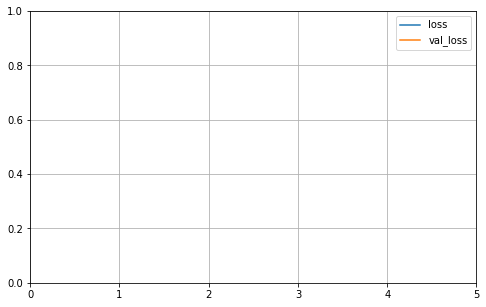

In [7]:
def plot_learning_curve(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curve(history)

In [9]:
model.evaluate(x_test_scaled, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

nan